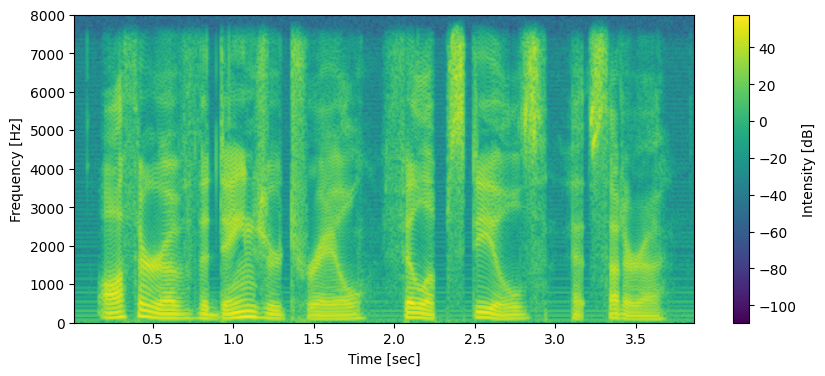

In [6]:

#wave形式の音声波形を読み込むためのモジュール(wave)をインポート
import wave as wave

#numpyをインポート（波形データを2byteの数値列に変換するために使用）
import numpy as np

#表示用
import matplotlib.pyplot as plt

#読み込むサンプルファイル
sample_wave_file="./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"

#ファイルを読み込む
wav=wave.open(sample_wave_file)

#PCM形式の波形データを読み込み
data=wav.readframes(wav.getnframes())

#dataを2バイトの数値列に変換
data=np.frombuffer(data, dtype=np.int16)

#スペクトログラムをプロットする
fig=plt.figure(figsize=(10,4))


#カラーバーを表示する

spectrum, freqs, t, im = plt.specgram(data, NFFT=512, noverlap=int(512/16*15), Fs=wav.getframerate())
fig.colorbar(im).set_label('Intensity [dB]')

#x軸のラベル
plt.xlabel("Time [sec]")

#y軸のラベル
plt.ylabel("Frequency [Hz]")

#音声ファイルを画像として保存
plt.savefig("./spectrogram.png")
#画像を画面に表示
plt.show()

#waveファイルを閉じる
wav.close()

In [12]:

#wave形式の音声波形を読み込むためのモジュール(wave)をインポート
import wave as wave

#numpyをインポート（波形データを2byteの数値列に変換するために使用）
import numpy as np

#scipyのsignalモジュールをインポート（stft等信号処理計算用)
import scipy.signal as sp

#読み込むサンプルファイル
sample_wave_file="./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"

#ファイルを読み込む
wav=wave.open(sample_wave_file)

#PCM形式の波形データを読み込み
data=wav.readframes(wav.getnframes())

#dataを2バイトの数値列に変換
data=np.frombuffer(data, dtype=np.int16)

#短時間フーリエ変換を行う
f,t,stft_data=sp.stft(data,fs=wav.getframerate(),window="hann",nperseg=512,noverlap=256)

#短時間フーリエ変換後のデータ形式を確認
print("短時間フーリエ変換後のshape: ",np.shape(stft_data))

#周波数軸の情報
print("周波数軸 [Hz]: ",f)

#時間軸の情報
print("時間軸[sec]: ",t)

#waveファイルを閉じる
wav.close()


短時間フーリエ変換後のshape:  (257, 244)
周波数軸 [Hz]:  [   0.     31.25   62.5    93.75  125.    156.25  187.5   218.75  250.
  281.25  312.5   343.75  375.    406.25  437.5   468.75  500.    531.25
  562.5   593.75  625.    656.25  687.5   718.75  750.    781.25  812.5
  843.75  875.    906.25  937.5   968.75 1000.   1031.25 1062.5  1093.75
 1125.   1156.25 1187.5  1218.75 1250.   1281.25 1312.5  1343.75 1375.
 1406.25 1437.5  1468.75 1500.   1531.25 1562.5  1593.75 1625.   1656.25
 1687.5  1718.75 1750.   1781.25 1812.5  1843.75 1875.   1906.25 1937.5
 1968.75 2000.   2031.25 2062.5  2093.75 2125.   2156.25 2187.5  2218.75
 2250.   2281.25 2312.5  2343.75 2375.   2406.25 2437.5  2468.75 2500.
 2531.25 2562.5  2593.75 2625.   2656.25 2687.5  2718.75 2750.   2781.25
 2812.5  2843.75 2875.   2906.25 2937.5  2968.75 3000.   3031.25 3062.5
 3093.75 3125.   3156.25 3187.5  3218.75 3250.   3281.25 3312.5  3343.75
 3375.   3406.25 3437.5  3468.75 3500.   3531.25 3562.5  3593.75 3625.
 3656.25 3687.5  371

再生開始


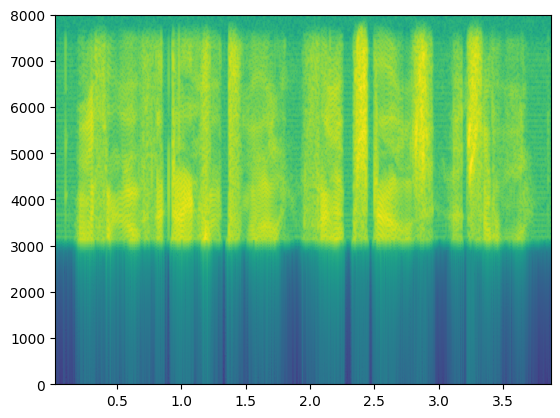

In [25]:


#wave形式の音声波形を読み込むためのモジュール(wave)をインポート
import wave as wave

#numpyをインポート（波形データを2byteの数値列に変換するために使用）
import numpy as np

#scipyのsignalモジュールをインポート（stft等信号処理計算用)
import scipy.signal as sp

#sounddeviceモジュールをインポート
import sounddevice as sd

#読み込むサンプルファイル
sample_wave_file="./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"

#ファイルを読み込む
wav=wave.open(sample_wave_file)

#PCM形式の波形データを読み込み
data=wav.readframes(wav.getnframes())

#dataを2バイトの数値列に変換
data=np.frombuffer(data, dtype=np.int16)

#短時間フーリエ変換を行う
f,t,stft_data=sp.stft(data,fs=wav.getframerate(),window="hann",nperseg=512,noverlap=256)

#特定の周波数成分を消す(100番目の周波数よりも高い周波数成分を全て消す)
stft_data[:100,:]=0


#時間領域の波形に戻す
t,data_post=sp.istft(stft_data,fs=wav.getframerate(),window="hann",nperseg=512,noverlap=256)
plt.specgram(data_post, NFFT=512, noverlap=int(512/16*15), Fs=wav.getframerate())

#2バイトのデータに変換
data_post=data_post.astype(np.int16)

#dataを再生する
sd.play(data_post,wav.getframerate())

print("再生開始")

#再生が終わるまで待つ
status = sd.wait()

#waveファイルを閉じる
wav.close()


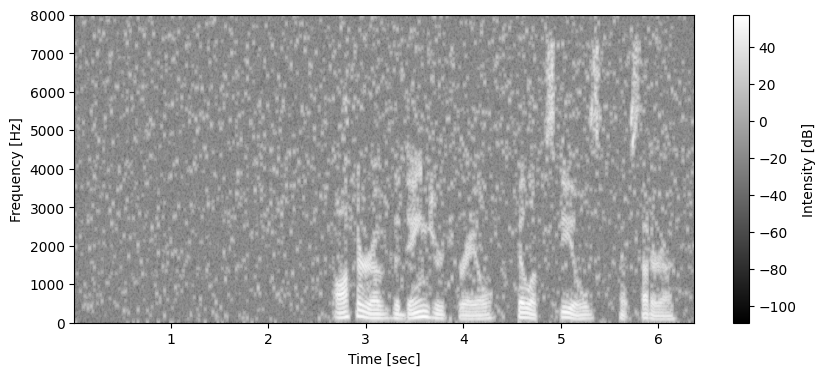

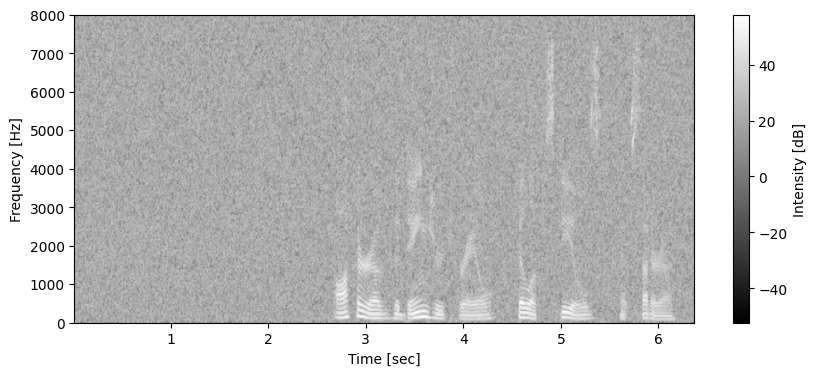

In [28]:


#wave形式の音声波形を読み込むためのモジュール(wave)をインポート
import wave as wave

#numpyをインポート（波形データを2byteの数値列に変換するために使用）
import numpy as np

#scipyのsignalモジュールをインポート（stft等信号処理計算用)
import scipy.signal as sp

#sounddeviceモジュールをインポート
import sounddevice as sd

#乱数の種を設定
np.random.seed(0)

#読み込むサンプルファイル
sample_wave_file="./CMU_ARCTIC/cmu_us_aew_arctic/wav/arctic_a0001.wav"

#ファイルを読み込む
wav=wave.open(sample_wave_file)

#音声区間の長さを取る
n_speech=wav.getnframes()

#サンプリングレートを取る
sampling_rate=wav.getframerate()

#PCM形式の波形データを読み込み
speech_signal=wav.readframes(wav.getnframes())

#speech_signalを2バイトの数値列に変換
speech_signal=np.frombuffer(speech_signal, dtype=np.int16)


#音声データに白色雑音を混ぜる

#雑音だけの区間のサンプル数を設定
n_noise_only=40000

#全体の長さ
n_sample=n_noise_only+n_speech

#白色雑音を生成
wgn_signal=np.random.normal(scale=0.04,size=n_sample)

#2バイトのデータとして書き込むためにスケールを調整 
wgn_signal=wgn_signal*np.iinfo(np.int16).max

#2バイトのデータに変換
wgn_signal=wgn_signal.astype(np.int16)

#白色雑音を混ぜる
mix_signal=wgn_signal
mix_signal[n_noise_only:]+=speech_signal

#短時間フーリエ変換を行う
f,t,stft_data=sp.stft(mix_signal,fs=wav.getframerate(),window="hann",nperseg=512,noverlap=256)

#入力信号の振幅を取得
amp=np.abs(stft_data)

#入力信号の位相を取得
phase=stft_data/np.maximum(amp,1.e-20)
#雑音だけの区間のフレーム数
n_noise_only_frame=np.sum(t<(n_noise_only/sampling_rate))

#スペクトルサブトラクションのパラメータ
p=1.0
alpha=2.0

#雑音の振幅を推定
noise_amp=np.power(np.mean(np.power(amp,p)[:,:n_noise_only_frame],axis=1,keepdims=True),1./p)


#入力信号の振幅の1%を下回らないようにする
eps=0.01*np.power(amp,p)

#出力信号の振幅を計算する
processed_amp=np.power(np.maximum(np.power(amp,p)-alpha*np.power(noise_amp,p),eps), 1./p)

#出力信号の振幅に入力信号の位相をかける
processed_stft_data=processed_amp*phase

#時間領域の波形に戻す
t,processed_data_post=sp.istft(processed_stft_data,fs=wav.getframerate(),window="hann",nperseg=512,noverlap=256)

#2バイトのデータに変換
processed_data_post=processed_data_post.astype(np.int16)

#waveファイルに書き込む
wave_out = wave.open("./process_wave_ss.wav", 'w')

#モノラル:1、ステレオ:2
wave_out.setnchannels(1)

#サンプルサイズ2byte
wave_out.setsampwidth(2)

#サンプリング周波数
wave_out.setframerate(wav.getframerate())

#データを書き込み
wave_out.writeframes(processed_data_post)

#ファイルを閉じる
wave_out.close()

import matplotlib.pyplot as plt 


#スペクトログラムをプロットする
fig=plt.figure(figsize=(10,4))

#スペクトログラムを表示する
spectrum,  freqs, t, im=plt.specgram(processed_data_post,NFFT=512,noverlap=int(512/16*15),Fs=wav.getframerate(),cmap="gray")

#カラーバーを表示する
fig.colorbar(im).set_label('Intensity [dB]')

#x軸のラベル
plt.xlabel("Time [sec]")

#y軸のラベル
plt.ylabel("Frequency [Hz]")

#音声ファイルを画像として保存
plt.savefig("./spectrogram_ss_result.png")

#画像を画面に表示
plt.show()


#雑音込みの入力信号も時間領域の波形に戻す
t,data_post=sp.istft(stft_data,fs=wav.getframerate(),window="hann",nperseg=512,noverlap=256)

#2バイトのデータに変換
data_post=data_post.astype(np.int16)

#スペクトログラムをプロットする
fig=plt.figure(figsize=(10,4))

#スペクトログラムを表示する
spectrum,  freqs, t, im=plt.specgram(data_post,NFFT=512,noverlap=int(512/16*15),Fs=wav.getframerate(),cmap="gray")

#カラーバーを表示する
fig.colorbar(im).set_label('Intensity [dB]')

#x軸のラベル
plt.xlabel("Time [sec]")

#y軸のラベル
plt.ylabel("Frequency [Hz]")

#音声ファイルを画像として保存
plt.savefig("./spectrogram_noisy.png")

#画像を画面に表示
plt.show()

#waveファイルに書き込む
wave_out = wave.open("./input_wave.wav", 'w')

#モノラル:1、ステレオ:2
wave_out.setnchannels(1)

#サンプルサイズ2byte
wave_out.setsampwidth(2)

#サンプリング周波数
wave_out.setframerate(wav.getframerate())

#データを書き込み
wave_out.writeframes(data_post)

#ファイルを閉じる
wave_out.close()

#waveファイルを閉じる
wav.close()






